In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import scipy
import shutil
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt
import torchvision.transforms as T
from tensorflow import keras, cast
from tensorflow.data import AUTOTUNE
from os import listdir, path , makedirs
from torchvision.datasets import ImageFolder
from tensorflow.keras.optimizers import Adam
# from tensorflow.data import AUTOTUNE as autotune
from tensorflow.keras import Model, backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import DenseNet121, InceptionV3
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.metrics import Accuracy, Precision, Recall
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img , ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Input , GlobalAveragePooling2D


from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import CategoricalCrossentropy


In [ ]:

# Training parameters
batch_size = 45
img_height = 224
img_width = 224
epochs = 200
epsilon = 0.1

parent_dir = '/content/drive/My Drive/garbage dataset/parent_dir'  # Change this to your new directory
dataset_dir = '/content/drive/My Drive/garbage dataset/dataset'

base_train_dir = '/content/drive/My Drive/garbage dataset/train'
base_val_dir = '/content/drive/My Drive/garbage dataset/validation'
base_test_dir = '/content/drive/My Drive/garbage dataset/test'

train_dir = '/content/drive/My Drive/garbage dataset/augmented_train'
test_dir = '/content/drive/My Drive/garbage dataset/augmented_test'
val_dir = '/content/drive/My Drive/garbage dataset/augmented_validation'

augmented_dataset_dir = '/content/drive/My Drive/garbage dataset/augmented_dataset'

train_adver_dir = '/content/drive/My Drive/garbage dataset/train_adversarial'
val_adver_dir = '/content/drive/My Drive/garbage dataset/val_adversarial'
test_adver_dir = '/content/drive/My Drive/garbage dataset/test_adversarial'


adversarial_and_normal_dir = '/content/drive/My Drive/garbage dataset/adversarial_and_normal_examples'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

for class_name in os.listdir(dataset_dir):
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

In [ ]:
# def copy_split_data(images, labels, train_dir, val_dir, test_dir, val_size=0.2, test_size=0.2):
#     # First split the dataset into training and temp (validation + test) sets
#     X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=(val_size + test_size), random_state=42)

#     # Now split the temp set into validation and test sets
#     val_test_split = test_size / (val_size + test_size)  # Adjust test size proportionally
#     X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_test_split, random_state=42)

#     # Create directories for train, validation, and test
#     for class_name in set(labels):
#         os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
#         os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
#         os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

#     # Copy training files
#     for img_path, label in zip(X_train, y_train):
#         shutil.copy(img_path, os.path.join(train_dir, label, os.path.basename(img_path)))

#     # Copy validation files
#     for img_path, label in zip(X_val, y_val):
#         shutil.copy(img_path, os.path.join(val_dir, label, os.path.basename(img_path)))

#     # Copy test files
#     for img_path, label in zip(X_test, y_test):
#         shutil.copy(img_path, os.path.join(test_dir, label, os.path.basename(img_path)))

# # Example usage
# images = [...]  # List of image file paths
# labels = [...]  # Corresponding labels for the images


In [ ]:
# target_augmentations = 5

# # Define augmentation parameters
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# def augment_images_in_dir(input_dir, output_dir, target_augmentations):
#     for class_name in os.listdir(input_dir):
#         class_input_dir = os.path.join(input_dir, class_name)
#         class_output_dir = os.path.join(output_dir, class_name)
#         print(class_input_dir)
#         if not os.path.isdir(class_input_dir):
#             continue

#         # Create the class output directory if it doesn't exist
#         os.makedirs(class_output_dir, exist_ok=True)

#         for img_name in os.listdir(class_input_dir):
#             img_path = os.path.join(class_input_dir, img_name)
#             img = tf.keras.preprocessing.image.load_img(img_path)
#             x = tf.keras.preprocessing.image.img_to_array(img)
#             x = x.reshape((1,) + x.shape)  # Reshape to (1, width, height, channels)


#             # Generate and save augmented images
#             i = 0
#             for batch in datagen.flow(x, batch_size=1, save_to_dir=class_output_dir, save_prefix='aug', save_format='jpeg'):
#                 i += 1
#                 if i >= target_augmentations:
#                     break  # Stop after generating the desired number of augmentations



# # Apply augmentation to train, validation, and test directories
# augment_images_in_dir(base_train_dir, train_dir, target_augmentations)
# augment_images_in_dir(base_val_dir, val_dir, target_augmentations)
# augment_images_in_dir(base_test_dir, test_dir, target_augmentations)

/content/drive/My Drive/garbage dataset/train/Glass
/content/drive/My Drive/garbage dataset/train/Plastic
/content/drive/My Drive/garbage dataset/train/Metal
/content/drive/My Drive/garbage dataset/train/Paper
/content/drive/My Drive/garbage dataset/train/Cardboard
/content/drive/My Drive/garbage dataset/validation/Glass
/content/drive/My Drive/garbage dataset/validation/Plastic
/content/drive/My Drive/garbage dataset/validation/Metal
/content/drive/My Drive/garbage dataset/validation/Paper
/content/drive/My Drive/garbage dataset/validation/Cardboard
/content/drive/My Drive/garbage dataset/test/Metal
/content/drive/My Drive/garbage dataset/test/Glass
/content/drive/My Drive/garbage dataset/test/Plastic
/content/drive/My Drive/garbage dataset/test/Paper
/content/drive/My Drive/garbage dataset/test/Cardboard


In [ ]:


# # List of original directories to copy from
# original_dirs = [train_dir, val_dir, test_dir]

# # Function to copy images to the consolidated directory
# def copy_images_to_consolidated(class_name, source_dir, target_dir):
#     source_class_dir = os.path.join(source_dir, class_name)
#     target_class_dir = os.path.join(target_dir, class_name)
#     os.makedirs(target_class_dir, exist_ok=True)

#     for img_name in os.listdir(source_class_dir):
#         img_source_path = os.path.join(source_class_dir, img_name)
#         img_target_path = os.path.join(target_class_dir, img_name)

#         # Avoid overwriting by adding a suffix if the image already exists
#         if os.path.exists(img_target_path):
#             base_name, ext = os.path.splitext(img_name)
#             img_target_path = os.path.join(target_class_dir, f"{base_name}_copy{ext}")

#         shutil.copy(img_source_path, img_target_path)
#         # print(f"Copied {img_name} to {target_class_dir}")

# # Consolidate all images from each original directory into the new structure
# for directory in original_dirs:
#     for class_name in os.listdir(directory):
#         if os.path.isdir(os.path.join(directory, class_name)):
#             copy_images_to_consolidated(class_name, directory, augmented_dataset_dir)

# print("Consolidation complete. Check the consolidated directory for results.")


Streaming output truncated to the last 5000 lines.
Copied aug_0_7962.jpeg to /content/drive/My Drive/garbage dataset/augmented_dataset/Metal
Copied aug_0_1423.jpeg to /content/drive/My Drive/garbage dataset/augmented_dataset/Metal
Copied aug_0_8262.jpeg to /content/drive/My Drive/garbage dataset/augmented_dataset/Metal
Copied aug_0_1446.jpeg to /content/drive/My Drive/garbage dataset/augmented_dataset/Metal
Copied aug_0_9882.jpeg to /content/drive/My Drive/garbage dataset/augmented_dataset/Metal
Copied aug_0_5953.jpeg to /content/drive/My Drive/garbage dataset/augmented_dataset/Metal
Copied aug_0_2200.jpeg to /content/drive/My Drive/garbage dataset/augmented_dataset/Metal
Copied aug_0_5362.jpeg to /content/drive/My Drive/garbage dataset/augmented_dataset/Metal
Copied aug_0_1112.jpeg to /content/drive/My Drive/garbage dataset/augmented_dataset/Metal
Copied aug_0_2978.jpeg to /content/drive/My Drive/garbage dataset/augmented_dataset/Metal
Copied aug_0_5341.jpeg to /content/drive/My Drive

In [ ]:
# Function to load images and labels
def load_dataset(source_dir):
    images = []
    labels = []

    for class_name in os.listdir(source_dir):
        class_path = os.path.join(source_dir, class_name)

        if os.path.isdir(class_path):  # Check if it is a directory
            for file_name in os.listdir(class_path):
                #if file_name.endswith(('.jpg', '.jpeg', '.png')):  # Add more formats if needed
                img_path = os.path.join(class_path, file_name)
                images.append(img_path)  # Save the file path
                labels.append(class_name)  # Use the class name as the label

    return images, labels

In [ ]:
# Load dataset
images, labels = load_dataset(augmented_dataset_dir)
print(len(images))
# Copy the split data
#copy_split_data(images, labels, train_dir, val_dir)
#copy_split_data(images, labels, train_dir, val_dir, test_dir, val_size=0.2, test_size=0.2)


23436


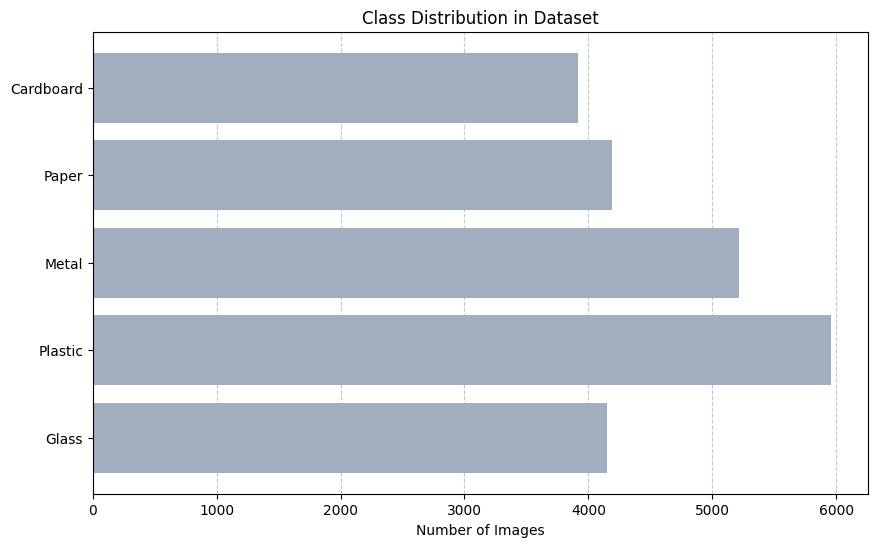

In [ ]:

def show_class_distribution(data_dir):
    class_counts = {}

    # Iterate through each class directory
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)

        # Check if it is a directory
        if os.path.isdir(class_path):
            # Count the number of image files in the class directory
            num_files = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))])
            class_counts[class_name] = num_files

    # Sort the class counts for better visualization
    class_names = list(class_counts.keys())
    counts = list(class_counts.values())

    # Plotting the class distribution
    plt.figure(figsize=(10, 6))
    plt.barh(class_names, counts, color='#a0aec0')  # Professional deep blue color
    plt.xlabel('Number of Images')
    plt.title('Class Distribution in Dataset')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# Call the function with the path to your dataset
show_class_distribution(augmented_dataset_dir)


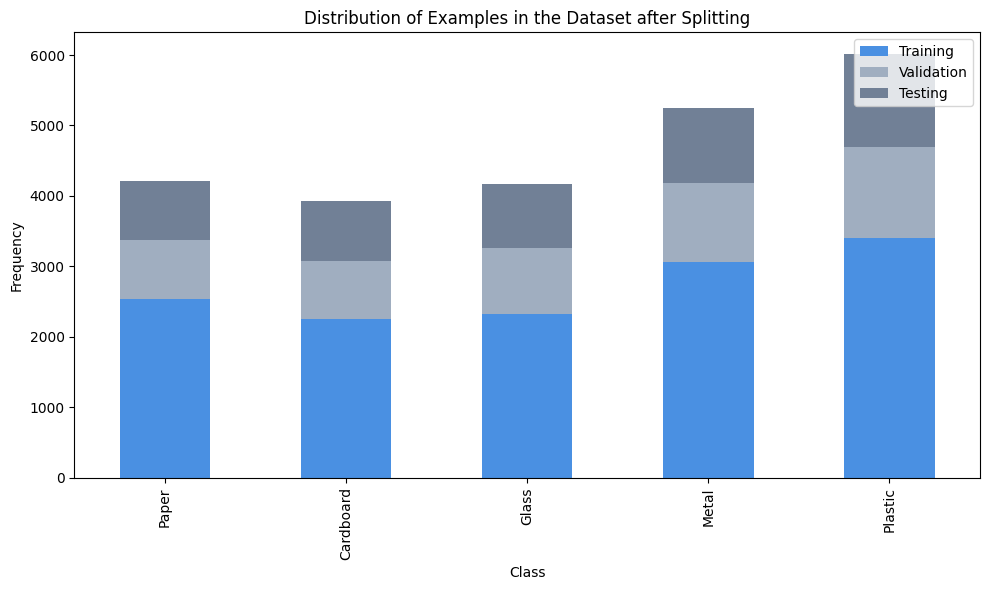

In [ ]:


# Define the paths to each dataset split
train_dir = '/content/drive/My Drive/garbage dataset/augmented_train'
test_dir = '/content/drive/My Drive/garbage dataset/augmented_test'
validate_dir = '/content/drive/My Drive/garbage dataset/augmented_validation'

# Define the classes
classes = ['Paper', 'Cardboard', 'Glass', 'Metal', 'Plastic']

# Function to count images in each class for each split
def count_images(directory, classes):
    counts = {}
    for cls in classes:
        class_dir = os.path.join(directory, cls)
        counts[cls] = len(os.listdir(class_dir)) if os.path.exists(class_dir) else 0
    return counts

# Get counts for each split
train_counts = count_images(train_dir, classes)
validate_counts = count_images(validate_dir, classes)
test_counts = count_images(test_dir, classes)

# Create a DataFrame for easier plotting
data = {
    'Training': train_counts,
    'Validation': validate_counts,
    'Testing': test_counts
}
df = pd.DataFrame(data, index=classes)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create a stacked bar plot with lighter professional colors
df.plot(kind='bar', stacked=True, ax=ax, color=['#4a90e2', '#a0aec0', '#718096'])  # Light Blue, Light Gray, Medium Gray

# Labeling
ax.set_ylabel('Frequency')
ax.set_xlabel('Class')
ax.set_title('Distribution of Examples in the Dataset after Splitting')

# Customize legend
ax.legend(title='', labels=['Training', 'Validation', 'Testing'], loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
# Data processing
def process(image, label):
    # imae = cast(image / 255.0, 'float32')
    image = tf.image.per_image_standardization(image)  # Normalize pixel values

    return image, label

In [ ]:

# Plotting training & validation accuracy and loss
def plot_history(history):
    # Accuracy plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

In [ ]:
#Fast Gradient Sign Method (FGSM),
def generate_adversarial_image(model, image, epsilon):
    image_tensor = tf.convert_to_tensor(image)
    image_tensor = tf.expand_dims(image_tensor, axis=0)  # Add batch dimension

    with tf.GradientTape() as tape:
        tape.watch(image_tensor)
        prediction = model(image_tensor)  # Get model predictions
        loss = tf.reduce_mean(prediction)  # Dummy loss using mean prediction

    gradients = tape.gradient(loss, image_tensor)
    signed_gradients = tf.sign(gradients)
    adversarial_image = image_tensor + epsilon * signed_gradients
    adversarial_image = tf.clip_by_value(adversarial_image, 0, 1)

    return adversarial_image.numpy()[0]  # Return the image without batch dimension



def create_adversarial_dataset(model,data_dir, adversarial_dir, epsilon=0.1, limit_ratio=0.5):
    for class_name in listdir(data_dir):
        class_path = path.join(data_dir, class_name)
        adversarial_class_path = path.join(adversarial_dir, class_name)

        # Create directory for adversarial images
        makedirs(adversarial_class_path, exist_ok=True)

        images = listdir(class_path)
        limit_count = int(len(images) * limit_ratio)  # Limit adversarial examples

        for img_name in images:
            img_path = path.join(class_path, img_name)
            img = load_img(img_path, target_size=(224, 224))  # Resize to model input size
            img_array = img_to_array(img) / 255.0  # Normalize the image

            # Generate adversarial image
            adversarial_image = generate_adversarial_image(model, img_array, epsilon)

            # Save the adversarial image if within limit
            # if limit_count > 0:
            save_img(path.join(adversarial_class_path, img_name), adversarial_image)
                # limit_count -= 1


In [ ]:
# # Generate adversarial images for densenet121
# best_model_path = '/content/drive/My Drive/garbage dataset/normal-mobilenetv3-garbage-18-0.9162.keras'
# dense_net_121 = load_model(best_model_path)

# create_adversarial_dataset(dense_net_121,train_dir, train_adver_dir, epsilon=0.1, limit_ratio=0.5)  # Adjust limit_ratio as needed
# create_adversarial_dataset(dense_net_121,val_dir, val_adver_dir, epsilon=0.1, limit_ratio=0.5)
# create_adversarial_dataset(dense_net_121,test_dir, test_adver_dir, epsilon=0.1, limit_ratio=0.5)


Found 13563 files belonging to 5 classes.
Found 5022 files belonging to 5 classes.

|------------------------------| Training MobileNetV3 (Frozen) |--------------------------------|

Epoch 1/20
424/424 ━━━━━━━━━━━━━━━━━━━━ 68s 139ms/step - accuracy: 0.3306 - loss: 1.6459 - precision_12: 0.3970 - recall_12: 0.1612 - val_accuracy: 0.6591 - val_loss: 0.8827 - val_precision_12: 0.7706 - val_recall_12: 0.4902 - learning_rate: 1.0000e-04
Epoch 2/20
424/424 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6906 - loss: 0.8300 - precision_12: 0.7921 - recall_12: 0.5433 - val_accuracy: 0.7541 - val_loss: 0.6743 - val_precision_12: 0.8245 - val_recall_12: 0.6476 - learning_rate: 1.0000e-04
Epoch 3/20
424/424 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7674 - loss: 0.6481 - precision_12: 0.8375 - recall_12: 0.6729 - val_accuracy: 0.7881 - val_loss: 0.5864 - val_precision_12: 0.8473 - val_recall_12: 0.7170 - learning_rate: 1.0000e-04
Epoch 4/20
424/424 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accurac

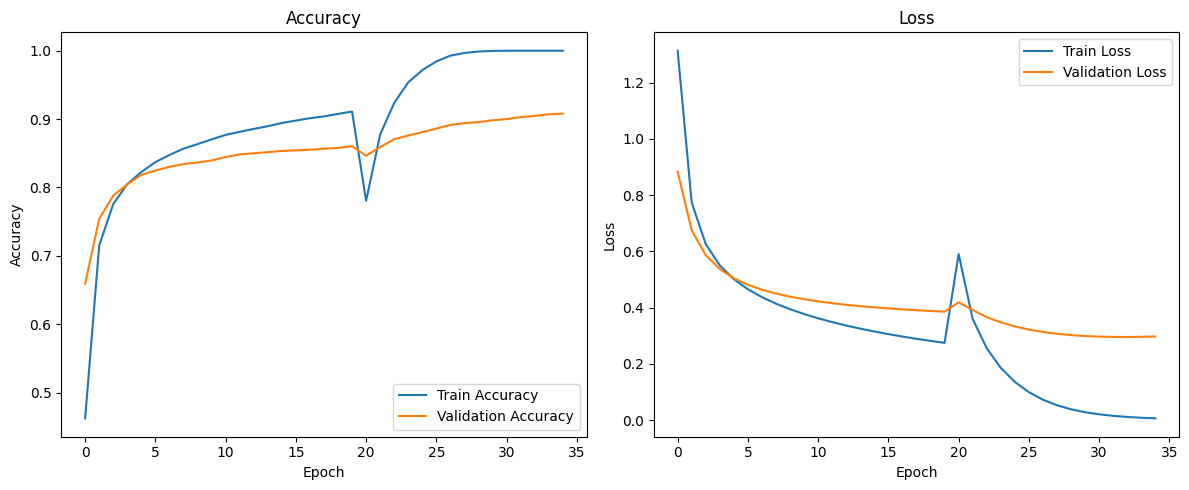

In [ ]:


# Paths
best_model_path = '/content/drive/My Drive/garbage dataset'
dataset_name = 'garbage'
train_dir = '/content/drive/My Drive/garbage dataset/augmented_train'
val_dir = '/content/drive/My Drive/garbage dataset/augmented_validation'

img_height, img_width = 224, 224

# Learning rates and callbacks
initial_learning_rate = 1e-4
fine_tune_learning_rate = 1e-5
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1
)
model_callback = EarlyStopping(monitor='val_loss', patience=10, mode='min')

# Check for dataset directories
if not os.path.exists(train_dir):
    raise ValueError(f"Training directory does not exist: {train_dir}")
if not os.path.exists(val_dir):
    raise ValueError(f"Validation directory does not exist: {val_dir}")

# Build MobileNetV3 model
MobileNetV3_base_model = MobileNetV3Large(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
MobileNetV3_base_model.trainable = False

# Custom model layers
inputs = Input(shape=(img_height, img_width, 3))
x = MobileNetV3_base_model(inputs)
x = GlobalAveragePooling2D()(x)
outputs = Dense(units=5, activation='softmax')(x)

MobileNetV3_model = Model(inputs, outputs, name='MobileNetV3')

# Compile the model
MobileNetV3_model.compile(
    optimizer=Adam(initial_learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

# Prepare the datasets
train_data = image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=32
)

# train_data = train_data.map(process)
train_data = train_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

val_data = image_dataset_from_directory(
    val_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=32
)

# val_data = val_data.map(process)
val_data = val_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Train the model
print('\n|------------------------------| Training MobileNetV3 (Frozen) |--------------------------------|\n')
model_checkpoint_fc = ModelCheckpoint(
    best_model_path + '/normal-mobilenetv3-' + dataset_name + '-{epoch:02d}-{val_accuracy:.4f}.keras',
    save_best_only=True,
    save_weights_only=False,
    monitor='val_accuracy',  # Ensure this monitors validation accuracy
    mode='max'
)

# Initial training phase
MobileNetV3_history = MobileNetV3_model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    verbose=1,
    callbacks=[model_checkpoint_fc, model_callback, reduce_lr]
)

# Unfreeze some or all of the layers for fine-tuning
print('\n|------------------------------| Fine-Tuning MobileNetV3 |--------------------------------|\n')
MobileNetV3_base_model.trainable = True  # Unfreeze all layers for fine-tuning

# Re-compile with a lower learning rate for fine-tuning
MobileNetV3_model.compile(
    optimizer=Adam(fine_tune_learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

# Fine-tuning phase
MobileNetV3_fine_tune_history = MobileNetV3_model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    verbose=1,
    callbacks=[model_checkpoint_fc, model_callback, reduce_lr]
)

# Merge history
for key in MobileNetV3_fine_tune_history.history.keys():
    if key in MobileNetV3_history.history:
        MobileNetV3_history.history[key].extend(MobileNetV3_fine_tune_history.history[key])
    else:
        MobileNetV3_history.history[key] = MobileNetV3_fine_tune_history.history[key]

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_history(MobileNetV3_history)

# Verify the saved model
# print('\n|------------------------------| Verifying Saved Model |--------------------------------|\n')
# saved_model_path = best_model_path + '/normal-mobilenetv3-garbage-20-0.9172.keras'  # Example path
# loaded_model = load_model(saved_model_path)

# # Evaluate the saved model on validation data
# val_results = loaded_model.evaluate(val_data)
# print(f"Validation Results: {dict(zip(loaded_model.metrics_names, val_results))}")



Found 13563 files belonging to 5 classes.
Found 5022 files belonging to 5 classes.

|------------------------------| Fine-Tuning the Loaded Model |--------------------------------|

Epoch 1/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 177s 167ms/step - accuracy: 0.7136 - loss: 1.0076 - precision_17: 0.7297 - recall_17: 0.6993 - val_accuracy: 0.7389 - val_loss: 0.7804 - val_precision_17: 0.7677 - val_recall_17: 0.7192 - learning_rate: 1.0000e-05
Epoch 2/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.7817 - loss: 0.6703 - precision_17: 0.7985 - recall_17: 0.7661 - val_accuracy: 0.7937 - val_loss: 0.6068 - val_precision_17: 0.8178 - val_recall_17: 0.7774 - learning_rate: 1.0000e-05
Epoch 3/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.8086 - loss: 0.5566 - precision_17: 0.8286 - recall_17: 0.7932 - val_accuracy: 0.8190 - val_loss: 0.5295 - val_precision_17: 0.8394 - val_recall_17: 0.8025 - learning_rate: 1.0000e-05
Epoch 4/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accu

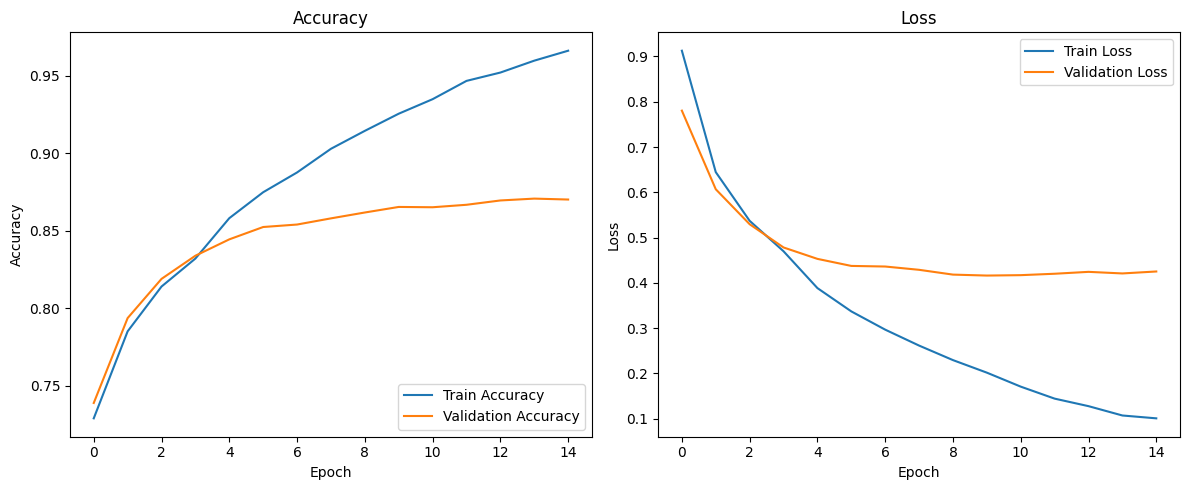

In [ ]:

# Load the pre-trained model
model_path = '/content/drive/My Drive/garbage dataset/normal-mobilenetv3-garbage-15-0.9080.keras'
mobilenetv3_loaded_model = load_model(model_path)

# Ensure Dropout Layer is Added After GlobalAveragePooling2D
x = mobilenetv3_loaded_model.layers[-2].output  # Output from GlobalAveragePooling2D
x = Dropout(0.5)(x)  # Dropout with 50% rate
output = mobilenetv3_loaded_model.layers[-1](x)  # Existing Dense layer
mobilenetv3_loaded_model = Model(inputs=mobilenetv3_loaded_model.input, outputs=output)

# Apply L2 Regularization to Applicable Layers
for layer in mobilenetv3_loaded_model.layers:
    if hasattr(layer, 'kernel_regularizer'):
        layer.kernel_regularizer = l2(0.01)  # Apply L2 regularization

# Unfreeze Layers for Fine-Tuning
for layer in mobilenetv3_loaded_model.layers:
    layer.trainable = True

# Recompile the Model
fine_tune_learning_rate = 1e-5  # Lower learning rate for fine-tuning
mobilenetv3_loaded_model.compile(
    optimizer=Adam(learning_rate=fine_tune_learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

# Prepare Datasets
adversarial_train_data = image_dataset_from_directory(
    train_adver_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=32
).cache().shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)

adversarial_val_data = image_dataset_from_directory(
    val_adver_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=32
).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Callbacks for Fine-Tuning
fine_tune_callbacks = [
    ModelCheckpoint(
        filepath=best_model_path + '/fine_tuned_adv_mobilenetv3-' + dataset_name + '-{epoch:02d}-{val_accuracy:.4f}.keras',
        save_best_only=True,
        monitor='val_loss',
        mode='min'
    ),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
]

# Fine-Tune the Model
print('\n|------------------------------| Fine-Tuning the Loaded Model |--------------------------------|\n')
fine_tuning_mobilenetv3_adv_history = mobilenetv3_loaded_model.fit(
    adversarial_train_data,
    validation_data=adversarial_val_data,
    epochs=50,
    verbose=1,
    callbacks=fine_tune_callbacks
)

# Plot Training History
plot_history(fine_tuning_mobilenetv3_adv_history)



In [ ]:

normal_data = image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=32
)
# normal_data = normal_data.map(process)
normal_data = normal_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


# Create validation dataset
adversarial_data = image_dataset_from_directory(
    test_adver_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=32
)

# adversarial_data = adversarial_data.map(process)
adversarial_data = adversarial_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


normal_model = load_model('/content/drive/My Drive/garbage dataset/normal-mobilenetv3-garbage-15-0.9080.keras')
adversarial_model_1 = load_model('/content/drive/My Drive/garbage dataset/fine_tuned_adv_mobilenetv3-garbage-10-0.8654.keras')



print("-mobilenetv3 Model Results:")



print("Normal Model Results:")
normal_model_on_normal_data = normal_model.evaluate(normal_data)
print("Results with normal data", normal_model_on_normal_data)
normal_model_on_adversarial_data = normal_model.evaluate(adversarial_data)
print("Results with Adversarial Data:", normal_model_on_adversarial_data)

print("adversarial Model 1 Results:")
adversarial_1_model_on_normal_data = adversarial_model_1.evaluate(normal_data)
print("Results with normal data", adversarial_1_model_on_normal_data)
normal_model_on_adversarial_data = adversarial_model_1.evaluate(adversarial_data)
print("Results with Adversarial Data:", normal_model_on_adversarial_data)




Found 5001 files belonging to 5 classes.
Found 5001 files belonging to 5 classes.
-mobilenetv3 Model Results:
Normal Model Results:
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 99ms/step - accuracy: 0.9095 - loss: 0.2887 - precision_13: 0.9159 - recall_13: 0.9037
Results with normal data [0.2997263967990875, 0.9036192893981934, 0.9108810424804688, 0.8972205519676208]
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.6124 - loss: 1.3929 - precision_13: 0.6318 - recall_13: 0.5933
Results with Adversarial Data: [1.3912677764892578, 0.6132773160934448, 0.6335893869400024, 0.593681275844574]
adversarial Model 1 Results:
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.8960 - loss: 0.5515 - precision_17: 0.9012 - recall_17: 0.8938
Results with normal data [0.5617082118988037, 0.8912217617034912, 0.8962454795837402, 0.8878224492073059]
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8532 - loss: 0.6576 - precision_17: 0.8645 - recall_17: 0.8442
Results with Adversarial Data: [0.6520

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 13563 files belonging to 5 classes.
Found 5022 files belonging to 5 classes.

|------------------------------| Training DenseNet121 (Frozen) |--------------------------------|

Epoch 1/40
424/424 ━━━━━━━━━━━━━━━━━━━━ 87s 161ms/step - accuracy: 0.2516 - loss: 4.8459 - precision: 0.2520 - recall: 0.2184 - val_accuracy: 0.3616 - val_loss: 2.0724 - val_precision: 0.3804 - val_recall: 0.2830 - learning_rate: 1.0000e-04
Epoch 2/40
424/424 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.3876 - loss: 1.9593 - precision: 0.4170 - recall: 0.3101 - val_accuracy: 0.4574 - val_loss: 1.5850 - val_precision: 0.4983 - val_recall: 0.3560 - learning_rate: 1.0000e-04
Epoch 3/40
424/424 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.4696 - loss: 1.5563 - precision: 0.5152 - recall: 0.3791 - val_accuracy: 0.5046 - val_loss: 1.3706 - val_precision: 0.5733 - val_recall: 0.4144 - learning_rate: 1.0000e-04
Epoch 4/40
424/424 ━━━━━━━━━━━━━━━━━━━━ 12s 2

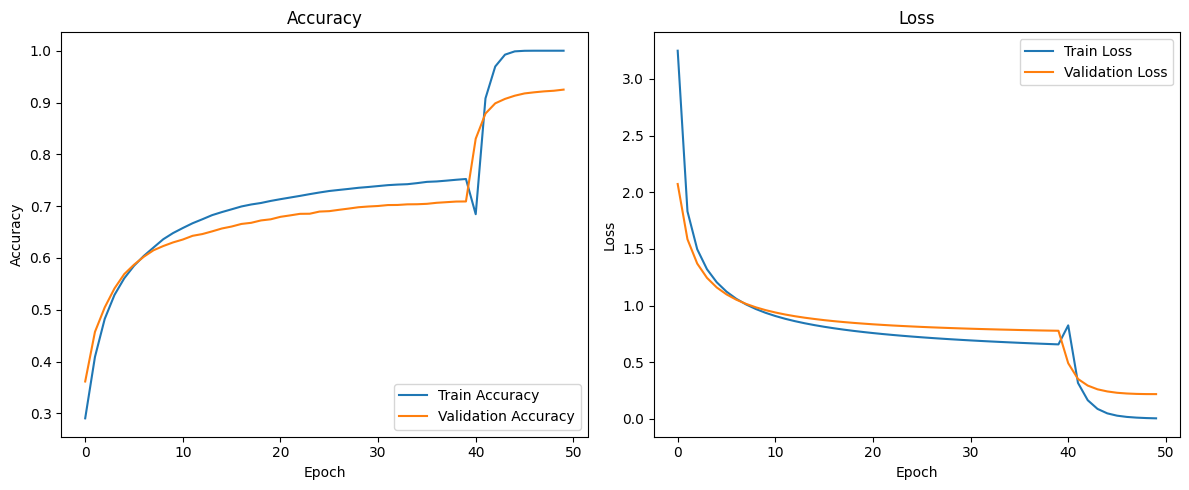


|------------------------------| Verifying Saved Model |--------------------------------|



ValueError: File not found: filepath=/content/drive/My Drive/garbage dataset/normal-densenet121-garbage-40-0.9300.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
# Paths
best_model_path = '/content/drive/My Drive/garbage dataset'
dataset_name = 'garbage'
train_dir = '/content/drive/My Drive/garbage dataset/augmented_train'
val_dir = '/content/drive/My Drive/garbage dataset/augmented_validation'

img_height, img_width = 224, 224

# Learning rates and callbacks
initial_learning_rate = 1e-4
fine_tune_learning_rate = 1e-5
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1
)
model_callback = EarlyStopping(monitor='val_loss', patience=10, mode='min')

# Check for dataset directories
if not os.path.exists(train_dir):
    raise ValueError(f"Training directory does not exist: {train_dir}")
if not os.path.exists(val_dir):
    raise ValueError(f"Validation directory does not exist: {val_dir}")

# Build DenseNet121 base model
DenseNet_base_model = DenseNet121(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
DenseNet_base_model.trainable = False

# Custom model layers
inputs = Input(shape=(img_height, img_width, 3))
x = DenseNet_base_model(inputs)
x = GlobalAveragePooling2D()(x)
outputs = Dense(units=5, activation='softmax')(x)

DenseNet_model = Model(inputs, outputs, name='DenseNet121')

# Compile the model with detailed metrics
DenseNet_model.compile(
    optimizer=Adam(initial_learning_rate),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# Prepare the datasets
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=32
).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=32
).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Train the model
print('\n|------------------------------| Training DenseNet121 (Frozen) |--------------------------------|\n')
model_checkpoint_fc = ModelCheckpoint(
    best_model_path + '/normal-densenet121-' + dataset_name + '-{epoch:02d}-{val_accuracy:.4f}.keras',
    save_best_only=True,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max'
)

# Initial training phase
DenseNet_history = DenseNet_model.fit(
    train_data,
    validation_data=val_data,
    epochs=40,
    verbose=1,
    callbacks=[model_checkpoint_fc, model_callback, reduce_lr]
)

# Unfreeze some or all of the layers for fine-tuning
print('\n|------------------------------| Fine-Tuning DenseNet121 |--------------------------------|\n')
DenseNet_base_model.trainable = True  # Unfreeze all layers for fine-tuning

# Re-compile with a lower learning rate for fine-tuning
DenseNet_model.compile(
    optimizer=Adam(fine_tune_learning_rate),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# Fine-tuning phase
DenseNet_fine_tune_history = DenseNet_model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    verbose=1,
    callbacks=[model_checkpoint_fc, model_callback, reduce_lr]
)

# Merge history
for key in DenseNet_fine_tune_history.history.keys():
    if key in DenseNet_history.history:
        DenseNet_history.history[key].extend(DenseNet_fine_tune_history.history[key])
    else:
        DenseNet_history.history[key] = DenseNet_fine_tune_history.history[key]

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_history(DenseNet_history)

# # Verify the saved model and evaluate with metrics
# print('\n|------------------------------| Verifying Saved Model |--------------------------------|\n')
# saved_model_path = best_model_path + '/normal-densenet121-' + dataset_name + '-40-0.9300.keras'  # Update the path
# loaded_model = tf.keras.models.load_model(
#     saved_model_path,
#     custom_objects={
#         'Precision': tf.keras.metrics.Precision,
#         'Recall': tf.keras.metrics.Recall
#     }
# )

# # Evaluate the saved model on validation data
# val_results = loaded_model.evaluate(val_data, verbose=1)
# metric_names = loaded_model.metrics_names
# evaluation_summary = dict(zip(metric_names, val_results))

# Print detailed evaluation results
# print("\n|------------------------------| Evaluation Results |--------------------------------|")
# for metric, value in evaluation_summary.items():
#     print(f"{metric.capitalize()}: {value:.4f}")


Found 13563 images belonging to 5 classes.
Found 5022 files belonging to 5 classes.

|------------------------------| Fine-Tuning the Loaded Model |--------------------------------|

Epoch 1/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 435s 657ms/step - accuracy: 0.6770 - loss: 1.0915 - precision_6: 0.7000 - recall_6: 0.6520 - val_accuracy: 0.8049 - val_loss: 0.6217 - val_precision_6: 0.8213 - val_recall_6: 0.7895 - learning_rate: 1.0000e-05
Epoch 2/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 202s 469ms/step - accuracy: 0.7618 - loss: 0.7350 - precision_6: 0.7831 - recall_6: 0.7412 - val_accuracy: 0.8250 - val_loss: 0.5431 - val_precision_6: 0.8397 - val_recall_6: 0.8158 - learning_rate: 1.0000e-05
Epoch 3/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 202s 468ms/step - accuracy: 0.7956 - loss: 0.6197 - precision_6: 0.8171 - recall_6: 0.7778 - val_accuracy: 0.8270 - val_loss: 0.5335 - val_precision_6: 0.8406 - val_recall_6: 0.8158 - learning_rate: 1.0000e-05
Epoch 4/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 201s 467ms/step - accuracy:

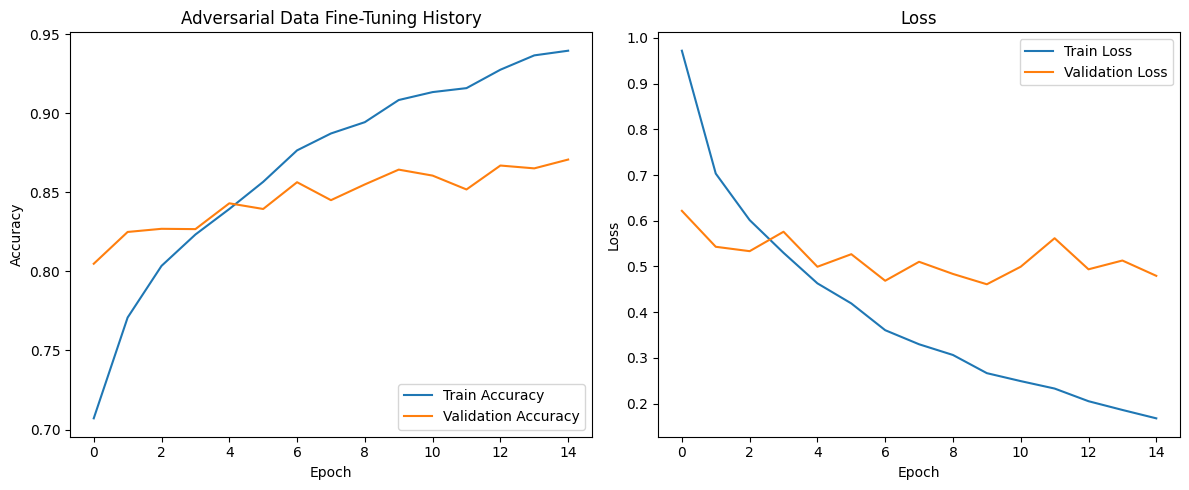

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Paths
best_model_path = '/content/drive/My Drive/garbage dataset'
dataset_name = 'garbage'
train_adver_dir = '/content/drive/My Drive/garbage dataset/train_adversarial'
val_adver_dir = '/content/drive/My Drive/garbage dataset/val_adversarial'

img_height, img_width = 224, 224
batch_size = 32

# Load the pre-trained DenseNet121 model
model_path = '/content/drive/My Drive/garbage dataset/normal-densenet121-garbage-10-0.9297.keras'
densenet121_loaded_model = load_model(model_path)

# Add Dropout Layer
x = densenet121_loaded_model.layers[-2].output  # Output from GlobalAveragePooling2D
x = Dropout(0.6)(x)  # Dropout with 60% rate
output = densenet121_loaded_model.layers[-1](x)  # Pass through the original Dense layer
densenet121_loaded_model = Model(inputs=densenet121_loaded_model.input, outputs=output)

# Apply L2 Regularization
for layer in densenet121_loaded_model.layers:
    if hasattr(layer, 'kernel_regularizer'):
        layer.kernel_regularizer = l2(0.01)

# Unfreeze Layers for Fine-Tuning
for layer in densenet121_loaded_model.layers:
    layer.trainable = True

# Recompile the Model
fine_tune_learning_rate = 1e-5
densenet121_loaded_model.compile(
    optimizer=Adam(learning_rate=fine_tune_learning_rate),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Data Augmentation for Adversarial Training
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,  # Added zoom augmentation
    brightness_range=[0.8, 1.2]  # Adjust brightness
)

adversarial_train_data = train_data_gen.flow_from_directory(
    train_adver_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

adversarial_val_data = image_dataset_from_directory(
    val_adver_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=batch_size
).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Callbacks for Fine-Tuning
fine_tune_callbacks = [
    ModelCheckpoint(
        filepath=best_model_path + f'/fine_tuned_adv_densenet121-{dataset_name}-{{epoch:02d}}-{{val_accuracy:.4f}}.keras',
        save_best_only=True,
        monitor='val_accuracy',
        mode='max'
    ),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]

# Fine-Tune the Model
print('\n|------------------------------| Fine-Tuning the Loaded Model |--------------------------------|\n')
fine_tuning_densenet121_adv_history = densenet121_loaded_model.fit(
    adversarial_train_data,
    validation_data=adversarial_val_data,
    epochs=50,
    verbose=1,
    callbacks=fine_tune_callbacks
)

# Plot Training History
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Adversarial Data Fine-Tuning History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_history(fine_tuning_densenet121_adv_history)


In [ ]:

normal_data = image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=32
)
# normal_data = normal_data.map(process)
normal_data = normal_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


# Create validation dataset
adversarial_data = image_dataset_from_directory(
    test_adver_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=32
)

# adversarial_data = adversarial_data.map(process)
adversarial_data = adversarial_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


normal_model = load_model('/content/drive/My Drive/garbage dataset/normal-densenet121-garbage-10-0.9249.keras')
adversarial_model_1 = load_model('/content/drive/My Drive/garbage dataset/fine_tuned_adv_densenet121-garbage-15-0.8708.keras')



print("densenet121 Model Results:")



print("Normal Model Results:")
normal_model_on_normal_data = normal_model.evaluate(normal_data)
print("Results with normal data", normal_model_on_normal_data)
normal_model_on_adversarial_data = normal_model.evaluate(adversarial_data)
print("Results with Adversarial Data:", normal_model_on_adversarial_data)

print("adversarial Model 1 Results:")
adversarial_1_model_on_normal_data = adversarial_model_1.evaluate(normal_data)
print("Results with normal data", adversarial_1_model_on_normal_data)
normal_model_on_adversarial_data = adversarial_model_1.evaluate(adversarial_data)
print("Results with Adversarial Data:", normal_model_on_adversarial_data)

# Evaluate the model and print all metrics
evaluation_results = normal_model.evaluate(val_data, verbose=1)

# Retrieve metric names and their values
metric_names = normal_model.metrics_names
evaluation_summary = dict(zip(metric_names, evaluation_results))





Found 5001 files belonging to 5 classes.
Found 5001 files belonging to 5 classes.
densenet121 Model Results:
Normal Model Results:
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step - accuracy: 0.9214 - loss: 0.2517 - precision: 0.9258 - recall: 0.9182
Results with normal data [0.2335154265165329, 0.9222155809402466, 0.927893340587616, 0.9186162948608398]
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.7313 - loss: 0.7905 - precision: 0.7681 - recall: 0.7010
Results with Adversarial Data: [0.787278950214386, 0.7274544835090637, 0.7646029591560364, 0.698860228061676]
adversarial Model 1 Results:
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.9197 - loss: 0.7700 - precision_6: 0.9223 - recall_6: 0.9181
Results with normal data [0.7430943250656128, 0.9194161295890808, 0.9216867685317993, 0.9178164601325989]
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8550 - loss: 0.9924 - precision_6: 0.8594 - recall_6: 0.8511
Results with Adversarial Data: [0.9661430716514587, 0.859

Found 13563 files belonging to 5 classes.
Found 5022 files belonging to 5 classes.

|------------------------------| Training Xception (Frozen) |--------------------------------|

Epoch 1/30
424/424 ━━━━━━━━━━━━━━━━━━━━ 58s 122ms/step - accuracy: 0.2399 - loss: 11.9541 - precision_5: 0.2405 - recall_5: 0.2345 - val_accuracy: 0.2798 - val_loss: 5.3356 - val_precision_5: 0.2817 - val_recall_5: 0.2684 - learning_rate: 1.0000e-04
Epoch 2/30
424/424 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.3159 - loss: 4.7451 - precision_5: 0.3189 - recall_5: 0.3026 - val_accuracy: 0.3013 - val_loss: 4.1888 - val_precision_5: 0.3084 - val_recall_5: 0.2887 - learning_rate: 1.0000e-04
Epoch 3/30
424/424 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.3360 - loss: 3.7406 - precision_5: 0.3420 - recall_5: 0.3176 - val_accuracy: 0.3184 - val_loss: 3.5829 - val_precision_5: 0.3284 - val_recall_5: 0.3019 - learning_rate: 1.0000e-04
Epoch 4/30
424/424 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.3590 -

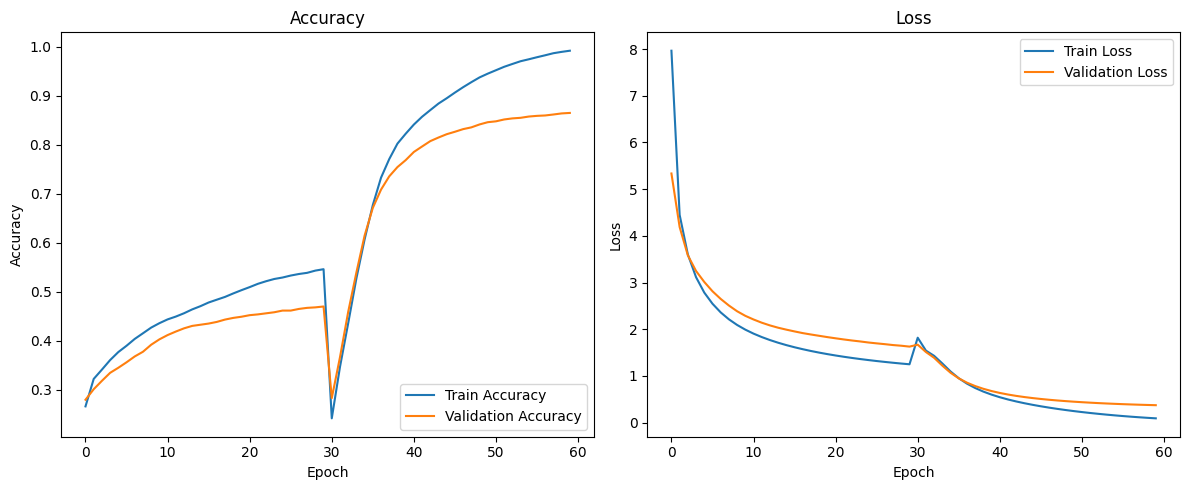

In [ ]:


# Paths
best_model_path = '/content/drive/My Drive/garbage dataset'
dataset_name = 'garbage'
train_dir = '/content/drive/My Drive/garbage dataset/augmented_train'
val_dir = '/content/drive/My Drive/garbage dataset/augmented_validation'

img_height, img_width = 224, 224
batch_size = 32

# Learning rates and callbacks
initial_learning_rate = 1e-4
fine_tune_learning_rate = 1e-6
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1
)
model_callback = EarlyStopping(monitor='val_loss', patience=10, mode='min')

# Check for dataset directories
if not os.path.exists(train_dir):
    raise ValueError(f"Training directory does not exist: {train_dir}")
if not os.path.exists(val_dir):
    raise ValueError(f"Validation directory does not exist: {val_dir}")

# Build Xception model
Xception_base_model = tf.keras.applications.Xception(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
Xception_base_model.trainable = False  # Freeze the base model

# Custom model layers
inputs = Input(shape=(img_height, img_width, 3))
x = Xception_base_model(inputs)
x = GlobalAveragePooling2D()(x)
outputs = Dense(units=5, activation='softmax')(x)

Xception_model = Model(inputs, outputs, name='Xception')

# Compile the model
Xception_model.compile(
    optimizer=Adam(initial_learning_rate),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Prepare the datasets
train_data = image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=batch_size
).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

val_data = image_dataset_from_directory(
    val_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=batch_size
).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Train the model
print('\n|------------------------------| Training Xception (Frozen) |--------------------------------|\n')
model_checkpoint_fc = ModelCheckpoint(
    best_model_path + '/normal-xception-' + dataset_name + '-{epoch:02d}-{val_accuracy:.4f}.keras',
    save_best_only=True,
    save_weights_only=False,
    monitor='val_accuracy',  # Ensure this monitors validation accuracy
    mode='max'
)

# Initial training phase
Xception_history = Xception_model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    verbose=1,
    callbacks=[model_checkpoint_fc, model_callback, reduce_lr]
)

# Unfreeze some or all of the layers for fine-tuning
print('\n|------------------------------| Fine-Tuning Xception |--------------------------------|\n')
Xception_base_model.trainable = True  # Unfreeze all layers for fine-tuning

# Re-compile with a lower learning rate for fine-tuning
Xception_model.compile(
    optimizer=Adam(fine_tune_learning_rate),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Fine-tuning phase
Xception_fine_tune_history = Xception_model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    verbose=1,
    callbacks=[model_checkpoint_fc, model_callback, reduce_lr]
)

# Merge history
for key in Xception_fine_tune_history.history.keys():
    if key in Xception_history.history:
        Xception_history.history[key].extend(Xception_fine_tune_history.history[key])
    else:
        Xception_history.history[key] = Xception_fine_tune_history.history[key]

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_history(Xception_history)

# Verify the saved model
# print('\n|------------------------------| Verifying Saved Model |--------------------------------|\n')
# saved_model_path = best_model_path + '/normal-xception-garbage-20-0.9172.keras'  # Example path
# loaded_model = load_model(saved_model_path)

# # Evaluate the saved model on validation data
# val_results = loaded_model.evaluate(val_data)
# print(f"Validation Results: {dict(zip(loaded_model.metrics_names, val_results))}")


Found 13563 images belonging to 5 classes.
Found 5022 files belonging to 5 classes.

|------------------------------| Fine-Tuning the Loaded Model |--------------------------------|

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


424/424 ━━━━━━━━━━━━━━━━━━━━ 294s 541ms/step - accuracy: 0.6807 - loss: 0.8568 - precision_7: 0.7395 - recall_7: 0.6150 - val_accuracy: 0.7780 - val_loss: 0.5919 - val_precision_7: 0.8201 - val_recall_7: 0.7362 - learning_rate: 1.0000e-05
Epoch 2/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 202s 468ms/step - accuracy: 0.7643 - loss: 0.6204 - precision_7: 0.8134 - recall_7: 0.7121 - val_accuracy: 0.8035 - val_loss: 0.5271 - val_precision_7: 0.8377 - val_recall_7: 0.7656 - learning_rate: 1.0000e-05
Epoch 3/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 203s 472ms/step - accuracy: 0.7988 - loss: 0.5354 - precision_7: 0.8416 - recall_7: 0.7567 - val_accuracy: 0.8232 - val_loss: 0.4788 - val_precision_7: 0.8492 - val_recall_7: 0.7939 - learning_rate: 1.0000e-05
Epoch 4/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 204s 473ms/step - accuracy: 0.8268 - loss: 0.4781 - precision_7: 0.8587 - recall_7: 0.7857 - val_accuracy: 0.8331 - val_loss: 0.4494 - val_precision_7: 0.8552 - val_recall_7: 0.8100 - learning_rate: 1.0000e-05
Epoch 5/50


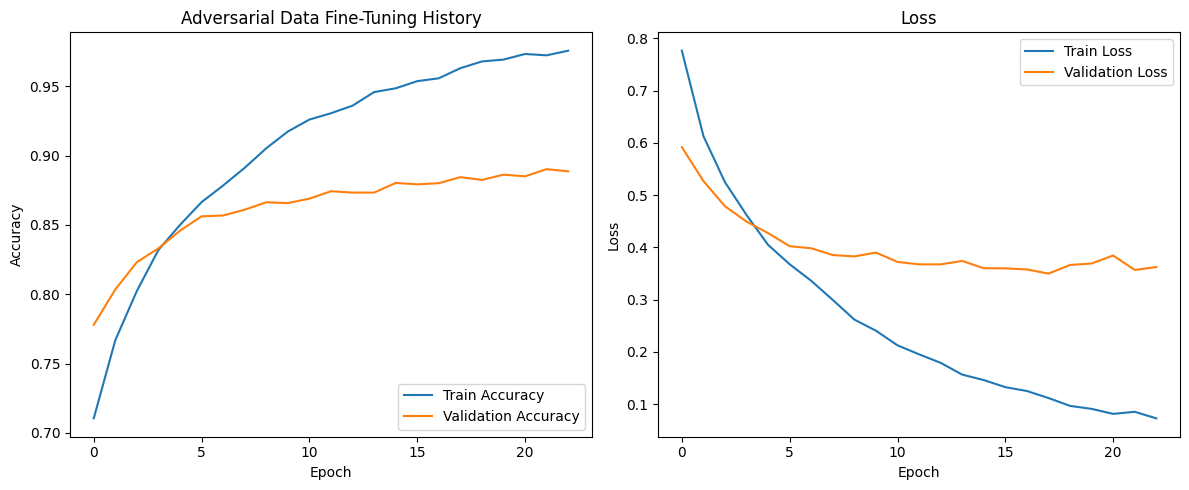

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Paths
best_model_path = '/content/drive/My Drive/garbage dataset'
dataset_name = 'garbage'
train_adver_dir = '/content/drive/My Drive/garbage dataset/train_adversarial'
val_adver_dir = '/content/drive/My Drive/garbage dataset/val_adversarial'

img_height, img_width = 224, 224
batch_size = 32

# Load the pre-trained xception model
model_path = '/content/drive/My Drive/garbage dataset/normal-xception-garbage-30-0.8652.keras'
xception_loaded_model = load_model(model_path)

# Add Dropout Layer
x = xception_loaded_model.layers[-2].output  # Output from GlobalAveragePooling2D
x = Dropout(0.6)(x)  # Dropout with 60% rate
output = xception_loaded_model.layers[-1](x)  # Pass through the original Dense layer
xception_loaded_model = Model(inputs=xception_loaded_model.input, outputs=output)

# Apply L2 Regularization
for layer in xception_loaded_model.layers:
    if hasattr(layer, 'kernel_regularizer'):
        layer.kernel_regularizer = l2(0.01)

# Unfreeze Layers for Fine-Tuning
for layer in xception_loaded_model.layers:
    layer.trainable = True

# Recompile the Model
fine_tune_learning_rate = 1e-5
xception_loaded_model.compile(
    optimizer=Adam(learning_rate=fine_tune_learning_rate),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Data Augmentation for Adversarial Training
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,  # Added zoom augmentation
    brightness_range=[0.8, 1.2]  # Adjust brightness
)

adversarial_train_data = train_data_gen.flow_from_directory(
    train_adver_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

adversarial_val_data = image_dataset_from_directory(
    val_adver_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=batch_size
).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Callbacks for Fine-Tuning
fine_tune_callbacks = [
    ModelCheckpoint(
        filepath=best_model_path + f'/fine_tuned_adv_xception-{dataset_name}-{{epoch:02d}}-{{val_accuracy:.4f}}.keras',
        save_best_only=True,
        monitor='val_accuracy',
        mode='max'
    ),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]

# Fine-Tune the Model
print('\n|------------------------------| Fine-Tuning the Loaded Model |--------------------------------|\n')
fine_tuning_xception_adv_history = xception_loaded_model.fit(
    adversarial_train_data,
    validation_data=adversarial_val_data,
    epochs=50,
    verbose=1,
    callbacks=fine_tune_callbacks
)

# Plot Training History
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Adversarial Data Fine-Tuning History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_history(fine_tuning_xception_adv_history)


In [ ]:

normal_data = image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=32
)
# normal_data = normal_data.map(process)
normal_data = normal_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


# Create validation dataset
adversarial_data = image_dataset_from_directory(
    test_adver_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=32
)

# adversarial_data = adversarial_data.map(process)
adversarial_data = adversarial_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


normal_model = load_model('/content/drive/My Drive/garbage dataset/normal-xception-garbage-30-0.8652.keras')
adversarial_model_1 = load_model('/content/drive/My Drive/garbage dataset/fine_tuned_adv_xception-garbage-22-0.8903.keras')



print("xception Model Results:")



print("Normal Model Results:")
normal_model_on_normal_data = normal_model.evaluate(normal_data)
print("Results with normal data", normal_model_on_normal_data)
normal_model_on_adversarial_data = normal_model.evaluate(adversarial_data)
print("Results with Adversarial Data:", normal_model_on_adversarial_data)

print("adversarial Model 1 Results:")
adversarial_1_model_on_normal_data = adversarial_model_1.evaluate(normal_data)
print("Results with normal data", adversarial_1_model_on_normal_data)
normal_model_on_adversarial_data = adversarial_model_1.evaluate(adversarial_data)
print("Results with Adversarial Data:", normal_model_on_adversarial_data)

# Evaluate the model and print all metrics
evaluation_results = normal_model.evaluate(val_data, verbose=1)

# Retrieve metric names and their values
metric_names = normal_model.metrics_names
evaluation_summary = dict(zip(metric_names, evaluation_results))





Found 5001 files belonging to 5 classes.
Found 5001 files belonging to 5 classes.
xception Model Results:
Normal Model Results:
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.8371 - loss: 0.4105 - precision_6: 0.8559 - recall_6: 0.8078
Results with normal data [0.4030323922634125, 0.843431293964386, 0.8647618889808655, 0.8170365691184998]
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.6803 - loss: 0.8160 - precision_6: 0.7428 - recall_6: 0.6111
Results with Adversarial Data: [0.8291270732879639, 0.6748650074005127, 0.7336561679840088, 0.6058788299560547]
adversarial Model 1 Results:
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9122 - loss: 0.5667 - precision_7: 0.9156 - recall_7: 0.9070
Results with normal data [0.5666443705558777, 0.9112177491188049, 0.9149667024612427, 0.9058188199996948]
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8829 - loss: 0.6390 - precision_7: 0.8902 - recall_7: 0.8800
Results with Adversarial Data: [0.6512017846107483,

Found 1066 files belonging to 5 classes.
Class names: ['Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic']
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 357ms/step


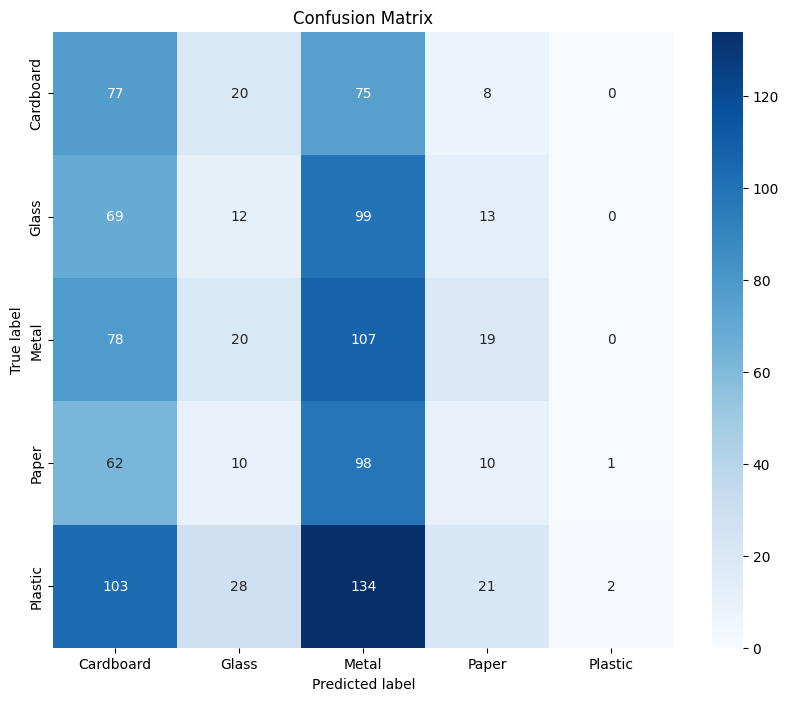

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

test_data = image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

# Load your model
normal_model = load_model('/content/drive/My Drive/garbage dataset/densenet121-garbage-189-0.8216.keras')
adversarial_model_1 = load_model('/content/drive/My Drive/garbage dataset/adversarial-densenet121-garbage-16-0.6930.keras')
adversarial_model_2 = load_model('/content/drive/My Drive/garbage dataset/adversarial-2-densenet121-garbage-159-0.6911.keras')
adversarial_model_3 = load_model('/content/drive/My Drive/garbage dataset/adversarial-3-densenet121-garbage-16-0.7061.keras')

model = normal_model


# Retrieve class names
class_names = test_data.class_names
print("Class names:", class_names)

# Load your model

# Make predictions
y_true = np.concatenate([y for _, y in test_data], axis=0)  # True labels
y_pred = model.predict(test_data)  # Predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class indices
y_true_classes = np.argmax(y_true, axis=1)  # True class indices

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(cm, class_names)



In [ ]:
# Analyze misclassifications
misclassifications = {}
for i in range(len(class_names)):
    misclassifications[class_names[i]] = {}
    for j in range(len(class_names)):
        if i != j:  # We only want misclassifications
            misclassifications[class_names[i]][class_names[j]] = cm[i][j]

# Display the misclassifications
for true_class, preds in misclassifications.items():
    print(f"Misclassifications for '{true_class}':")
    for pred_class, count in preds.items():
        if count > 0:  # Only show if there are misclassifications
            print(f"  - Predicted as '{pred_class}': {count} times")

Misclassifications for 'Cardboard':
  - Predicted as 'Glass': 20 times
  - Predicted as 'Metal': 75 times
  - Predicted as 'Paper': 8 times
Misclassifications for 'Glass':
  - Predicted as 'Cardboard': 69 times
  - Predicted as 'Metal': 99 times
  - Predicted as 'Paper': 13 times
Misclassifications for 'Metal':
  - Predicted as 'Cardboard': 78 times
  - Predicted as 'Glass': 20 times
  - Predicted as 'Paper': 19 times
Misclassifications for 'Paper':
  - Predicted as 'Cardboard': 62 times
  - Predicted as 'Glass': 10 times
  - Predicted as 'Metal': 98 times
  - Predicted as 'Plastic': 1 times
Misclassifications for 'Plastic':
  - Predicted as 'Cardboard': 103 times
  - Predicted as 'Glass': 28 times
  - Predicted as 'Metal': 134 times
  - Predicted as 'Paper': 21 times


In [ ]:
class_names = test_data.class_names
print("Class names:", class_names)

Class names: ['Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic']


def create_model():
    base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=True, weights=None, classes=9)  # 9 classes
    model = models.Sequential()
    model.add(base_model)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model